# Bar Chart

Here's an example of a function that displays a bar chart. This chart is showing the results of a made up test for people in different age groups. 

In [1]:
from cs103 import *
from typing import List

# List[int]
# interp. a list of integers
L0 = []
L1 = [3, -2]

# template based on arbitrary-sized
@typecheck
def fn_for_loi(loi: List[int]) -> ...:
    # description of accumulator
    acc = ... # type: ...
    
    for i in loi:
        acc = ...(i, acc)
    
    return ...(acc)

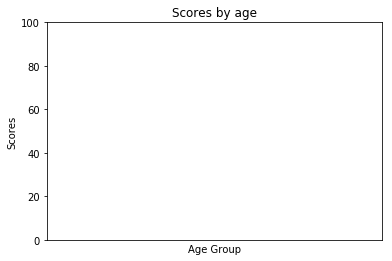

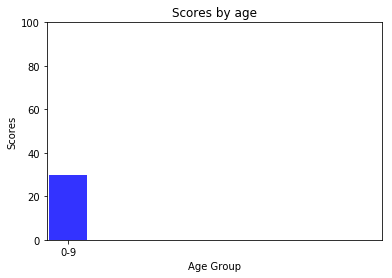

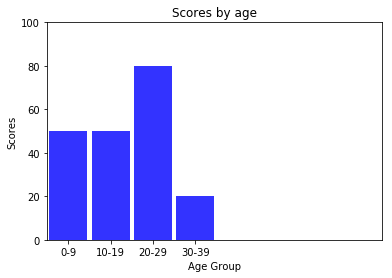

10 of 10 tests passed


In [2]:
# Note that here we're importing matplotlib.pyplot as plt. That means we need to use the name 
# plt whenever we want to use the pyplot library. In other examples, we've imported it as pyplot 
# and that would mean we need to use the name pyplot whenever we want to use the pyplot library.
import matplotlib.pyplot as plt

@typecheck
def display_bar_chart(means: List[int]) -> None:
    """
    display a bar chart showing the mean scores for the test by age group
    
    the age groups are assumed to start at 0 and span 10 years (e.g. 0-9, 10-19, etc.)
    """
    # return None #stub
    # Template based on visualization
    
    # the width of each bar
    bar_width = 9
    
    # the middle coordinate for each of the bars for the bar chart
    # we want to space them every 10 pixels, since we used a bar width of 9.
    middle_of_bars = produce_num_sequence(means, 5, bar_width + 1)
    
    # Notice that you could write a function to produce middle_of_bars.
    # (Imagine we gave you the array means above and asked "design
    # a function to produce a list of the same length as means
    # containing multiples of 10 like [0, 10, 20, 30, ...]". Could
    # you design that function?)
    
    # the opacity for the bars. It must be between 0 and 1, and higher numbers are more opaque (darker)
    opacity = 0.8
    
    # create the first bar chart
    rects1 = plt.bar(middle_of_bars, 
                     means,                         # list containing the height for each bar, here the means
                     bar_width,
                     alpha=opacity,                 # set the opacity
                     color='b')                     # set the colour (here, blue)

    # set the labels for the x-axis, y-axis, and plot title
    plt.xlabel('Age Group')
    plt.ylabel('Scores')
    plt.title('Scores by age')
    
    # set the range for the axes
    # [x-min, x-max, y-min, y-max]
    plt.axis([0,79,0,100])
    
    # set the x-coordinate for positioning the labels. Here, we want each label to be in the middle of each bar
    x_coord_labels = middle_of_bars
    
    # set the labels for each 'tick' on the x-axis
    tick_labels = produce_age_labels(means)
    
    plt.xticks(x_coord_labels, tick_labels)
    
    # show the plot
    plt.show()
    
    # by default, Python returns None if it gets to the end of a function and there is no call to return
    # so we could have omitted the next line of code. It also returns None when there is a return 
    # statement that does not explicitly return a value (like we have here)
    return
    
# Note that this can be used with List[int] for values as well.
# In fact, it doesn't really matter what values is a list of, but we haven't learned how to note that.
@typecheck
def produce_num_sequence(values: List[float], initial: float, gap: float) -> List[float]:
    """
    Produce a list of numbers like [initial, initial + gap, initial + 2*gap, ...] of the same
    length as values, e.g., to give alignment coordinates for a plot. The number
    of numbers in the list is equal to len(values). The first value is initial. The gap between values
    is gap.
    
    E.g., [5,15,25,35,45,55,65,75] for 8 values, initial == 5, and gap == 10.
    """
    #return []  #stub
    # Template from List[float] with two additional parameters
    
    # nums is the numbers for the values seen so far
    nums = []  # type: List[int]
    
    # next_num is the next number to use
    next_num = initial
    
    for val in values:
        nums.append(next_num)
        next_num = next_num + gap
    
    return nums

@typecheck
def produce_age_labels(values: List[int]) -> List[str]:
    """
    produce appropriate labels for the age ranges for the given values
    
    Starts at the 0-9 age range and continues from there, e.g., ['0-9', '10-19', '20-29'] for 3 values
    """
    #return []  #stub
    # Template from List[int]
    
    # labels is the labels for the values seen so far
    labels = []  # type: List[str]
    
    # range_start is the start of the next age range
    range_start = 0
    
    for val in values:
        next_range_start = range_start + 10
        labels.append(produce_label(range_start, next_range_start))
        range_start = next_range_start
    
    return labels

@typecheck
def produce_label(start: int, end: int) -> str:
    """
    return a label for the age range [start, end)
    
    assumes end > start
    """
    #return ""  #stub
    # template based on atomic non-distinct (two parameters)
    return str(start) + "-" + str(end - 1)

start_testing()

# Notice that these display_bar_chart tests only check that display_bar_chart returns None directly.
# We need to visually inspect the output to see if the plot matches with what we expect.
# So, we document in text, by "drawing" the output in text, or by adding a Markdown cell and using
# the "Edit" menu's "Insert Image" option there to paste in a sketch of the plot that's expected.

# Should produce an empty graph with x axis "Age Group", y axis "Scores", and label for the graph "Scores by age"
expect(display_bar_chart([]), None)

# Should look vaguely like this, with the same title/labels described above:
#
#     |
# 100 |
#     |
#     |
#     |
#     |
#  50 |
#     |
#     |  *
#     |  *
#     |  *
#     +--------------------------------------------
#
#       0-9
expect(display_bar_chart([30]), None)

# Should look vaguely like this, with the same title/labels described above:
#
#     |
# 100 |
#     |
#     |             *
#     |             *
#     |             *
#  50 |  *    *     *
#     |  *    *     *
#     |  *    *     *
#     |  *    *     *     *
#     |  *    *     *     *
#     +--------------------------------------------
#
#       0-9 10-19 20-29 30-39
expect(display_bar_chart([50, 50, 80, 20]), None)

expect(produce_num_sequence([], 5, 10), [])
expect(produce_num_sequence([1, 10, 3], 5, 10), [5, 15, 25])
expect(produce_num_sequence([1, 10, 3], 0.5, 3.5), [0.5, 4.0, 7.5])

expect(produce_age_labels([]), [])
expect(produce_age_labels([1, 10, 3]), ['0-9', '10-19', '20-29'])

expect(produce_label(0, 10), '0-9')
expect(produce_label(3, 42), '3-41')

summary()

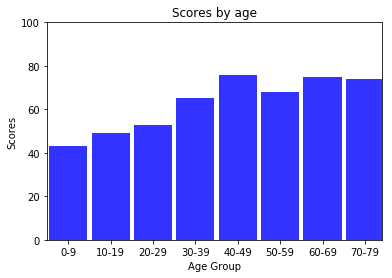

In [3]:
# It's not clear what "real" information we wanted to visualize, but let's imagine that
# the list [43, 49, 53, 65, 76, 68, 75, 74] was our target. We could plot it like this:
display_bar_chart([43, 49, 53, 65, 76, 68, 75, 74])

# Running this cell produces a bar chart that shows this information below..

# Two bar charts on the same plot

We can also create two bar charts on the same plot. In this case, we're showing the results of a made up memory experiment. This imaginary experiment had five control groups and five treatment groups. The bar chart is showing the mean score on a memory test for each group as well as the error bars.

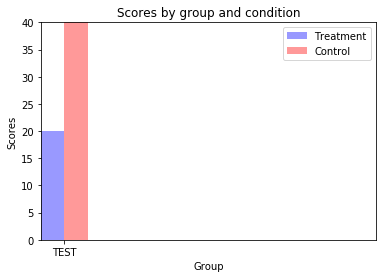

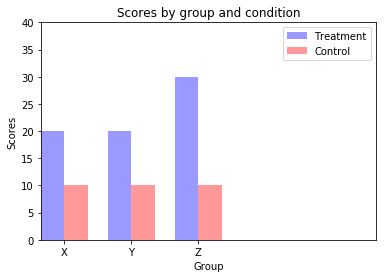

2 of 2 tests passed


In [4]:
import matplotlib.pyplot as plt

@typecheck
def display_two_charts(means_treatment: List[int], 
                       means_control: List[int],
                       group_labels: List[str]) -> None:
    """
    Plot a bar graph with treatment and control means side-by-side labelled by group
    
    Assumes all three list parameters are the same (non-zero) length.
    """
    #return None  #stub
    # Template based on visualization
    
    # the width of each bar
    bar_width = 0.35
    
    # the middle coordinate for each of the bars for the first bar chart (treatment groups)
    middle_of_bars_treatment = produce_num_sequence(means_treatment, 0, 1)
    
    # the middle coordinate for each of the bars for the second bar chart (control groups). Note that each 
    # entry in the list is exactly bar_width greater than the corresponding entry in the 
    # middle_of_bars_treatment list
    middle_of_bars_control = produce_num_sequence(means_treatment, bar_width, 1)
    
    # the opacity for the bars. It must be between 0 and 1, and higher numbers are more
    # opaque (darker)
    opacity = 0.4
    
    # create the first bar chart
    rects1 = plt.bar(middle_of_bars_treatment, 
                     means_treatment,                # list containing the height for each bar, here the means
                     bar_width,
                     alpha=opacity,                  # set the opacity
                     align='edge',
                     color='b',                      # set the colour (here, blue)
                     label='Treatment')

    rects2 = plt.bar(middle_of_bars_control, 
                     means_control, 
                     bar_width,
                     alpha=opacity,
                     align='edge',
                     color='r',                       # notice that we use a different colour (red)
                     label='Control')

    # set the labels for the x-axis, y-axis, and plot title
    plt.xlabel('Group')
    plt.ylabel('Scores')
    plt.title('Scores by group and condition')

    # set the axes for our chart
    plt.axis([0,5,0,40])

    # set the labels for each 'tick' on the x-axis
    plt.xticks(middle_of_bars_control, group_labels)
    
    # we want to show the legend because this plot contains two bar charts. The arguments will place
    # the legend to the right of the plot
    plt.legend(loc='upper right')
    
    # show the plot
    plt.show()
    
    return


start_testing()

# Should produce a graph with y axis "Scores", x axis "Group", title "Scores by group and condition",
# and a legend (showing the color for * is treatment and for # is control) that looks roughly like:
#
#  40 |   #             
#     |   #
#  20 |  *#
#     |  *#
#     +--------------------------
#       TEST
#
expect(display_two_charts([20], [40], ['TEST']), None)

# Should produce a graph with axes/title/legend as above that looks roughly like:
#
#  40 |                 
#     |          *    
#  20 |   *   *  *
#     |   *#  *# *#
#     +--------------------------
#         X   Y  Z
#
expect(display_two_charts([20, 20, 30], [10, 10, 10], ['X', 'Y', 'Z']), None)


# Note that the following test will fail with an error:
# expect(display_two_charts([], [], []), None)
#
# The reason is to do with attaching a legend to a bar graph.
# To create the legend, matplotlib needs to access one of the plotted 
# data points as the "template" for what the legend should look like. 
# With no data points, that fails.


summary()

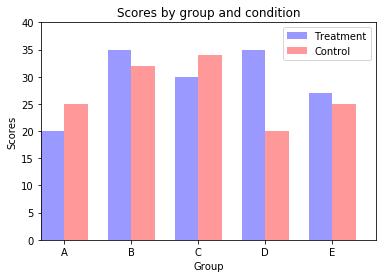

In [5]:
# We'll imagine that this is the "target" graph we were trying to create:
display_two_charts([20, 35, 30, 35, 27], [25, 32, 34, 20, 25], ['A', 'B', 'C', 'D', 'E'])

# Running this cell will produce the graph: